<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(1)_3%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[ 미니 프로젝트 (1) ]**
### **8기 3조 - 서혜현, 곽지수, 임정현, 서유진, 이인서**

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 

- 조건: 변수 2개 이상 연결한 결과값 포함

- 제출기한: 2022.04.03 (월) 23:59

- 관련 사이트: https://dacon.io/competitions/open/235536/data


# **1. 라이브러리 및 데이터**

In [ ]:
# 나눔 폰트 설치 / 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기 
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/movies_train.csv')

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# **2. 탐색적 자료분석(EDA)**

# **1) 데이터 설명**

+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


# **2) 데이터 요약**

In [ ]:
train.shape

(600, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# **3) 데이터의 요약 통계량 확인** 

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


# **4) 결측치 확인 및 데이터 전처리** 

In [ ]:
train.isna().sum() # dir_prev_bfnum 변수에 결측값이 존재한다.

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

# **5) 데이터 시각화 및 분석**

## **(1) 월별 관객수**
* **사용 변수** 
##### 개봉일 : release_time
##### 관객수 : box_off_num

In [ ]:
# 연/월/일/요일 별 칼럼

#연
train['release_year']=train['release_time'].dt.year
# 월
train['release_month']=train['release_time'].dt.month
# 일
train['release_day']=train['release_time'].dt.day
# 요일
train['release_weekday']=train['release_time'].dt.weekday

In [ ]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_month,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


### **그래프 1) 월별 관객수 막대그래프**

<Axes: xlabel='release_month'>

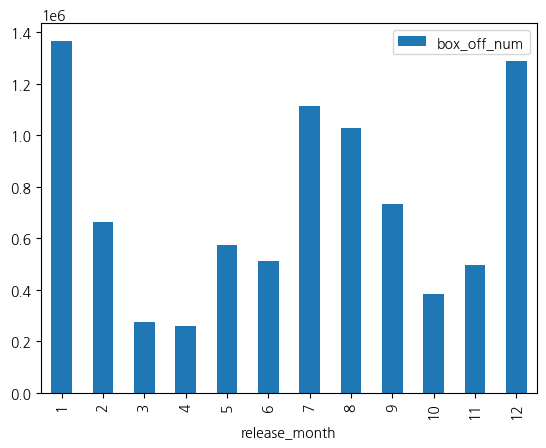

In [ ]:
train[['release_month','box_off_num']].groupby('release_month').mean().plot(kind='bar')

<Axes: xlabel='release_month'>

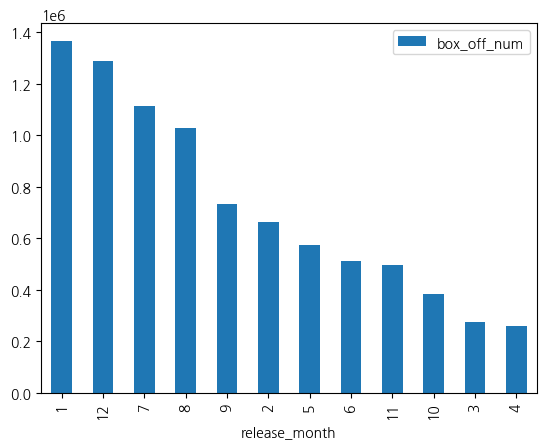

In [ ]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False).plot(kind='bar')

### **그래프 2) 월별 관객수 boxplot**

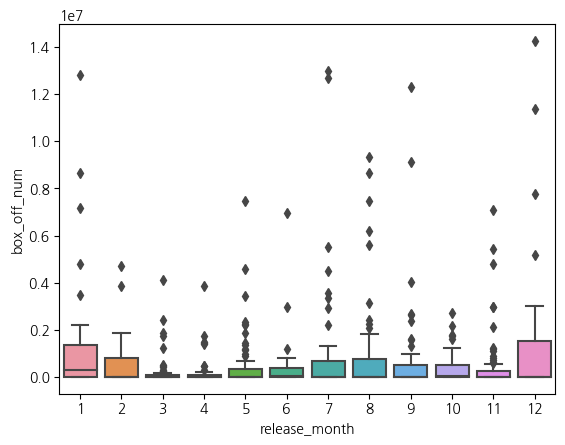

In [ ]:
boxplot=plt.subplots()
boxplot=sns.boxplot(x='release_month', y='box_off_num', data=train)

**▶ 그래프 해석**
- 1, 7, 8, 12월에 개봉하는 영화의 관람객 수가 상대적으로 많음을 확인할 수 있다.

## **(2) 상영시간과 관객수**
* **사용 변수**
##### 상영시간 : time
##### 관객수 : box_off_num

<BarContainer object of 600 artists>

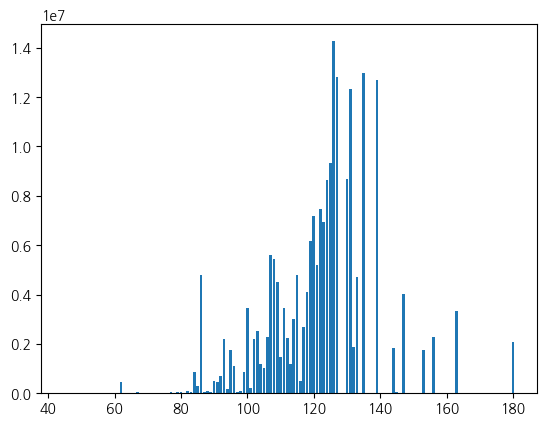

In [ ]:
plt.bar(train.time, train.box_off_num)

**▶ 그래프 해석**
- 상영시간이 120-140분 사이일 때 관람객 수가 가장 많은 것을 확인할 수 있다.

## **(3) 배급사별 영화 스텝 수**
* **사용 변수**
##### distributor : 배급사 
##### num_staff : 스텝 수 

In [ ]:
# 배급사별 평균 스텝수 구하기 
st_mean=train[['distributor','num_staff']].groupby('distributor').mean()
st_mean.sort_values(by='num_staff', ascending=False,inplace=True)
st_mean

,num_staff
distributor,
주머니필름,477.0
(주)아이필름코퍼레이션,458.0
스튜디오 블루,436.0
SK텔레콤(주),410.0
KT,364.0
...,...
(주)패뷸러스,0.0
하준사,0.0
(주)콘텐츠 윙,0.0


In [ ]:
# 대부분의 영화에서 스텝의 수가 두자릿 수임을 확인, 분석을 위해 평균 스텝수가 많은 상위 15개를 추출
staff=st_mean[0:16]
staff=pd.DataFrame(staff)
staff=staff.reset_index(inplace=False) # 기존 인덱스를 새로운 칼럼으로 추가
staff

,distributor,num_staff
0,주머니필름,477.0
1,(주)아이필름코퍼레이션,458.0
2,스튜디오 블루,436.0
3,SK텔레콤(주),410.0
4,KT,364.0
5,(주)쇼박스,360.4
6,CGV 아트하우스,342.5
7,전주국제영화제,336.0
8,CJ E&M Pictures,335.0
9,시너지,333.1


In [ ]:
# 평균 스텝수가 상위 15개인 배급사에 대한 원본 데이터를 가져오기
train_dist=train[train['distributor'].isin(staff['distributor'])]
train_dist.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,2012,10,25,3


### **그래프1) 배급사별 평균 스텝수 그래프**

Text(0.5, 1.0, '배급사별 평균 스텝 수')

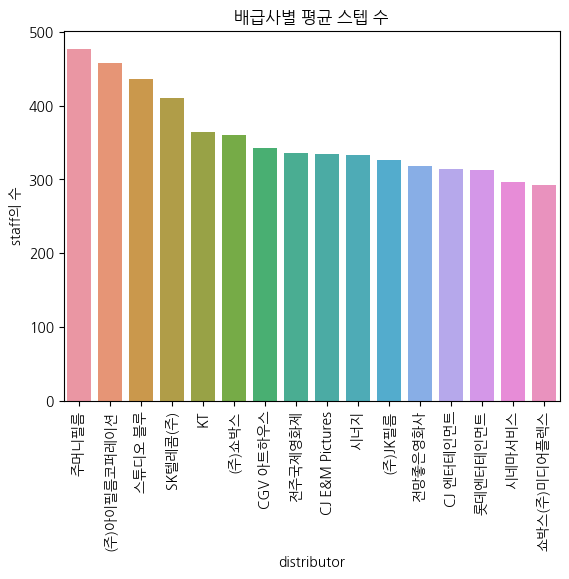

In [ ]:
plt.xticks(rotation=90)
ax=sns.barplot(data=staff, x='distributor',y='num_staff')
ax.set_xlabel('distributor')
ax.set_ylabel('staff의 수')
ax.set_title('배급사별 평균 스텝 수')

**▶ 그래프 해석**
- 주머니필름, (주)아이필름코퍼레이션, 스튜디오 블루, SK텔레콤(주) 순으로 높으며, 이 4개의 배급사는 평균 스탭의 수가 400이상으로 다른 배급사에 비해 월등히 스텝수가 많음을 알 수 있다.

### **그래프 2) 배급사별 스텝수에 대한 boxplot 그래프**

Text(0.5, 1.0, '배급사별 스텝 수에 대한 boxplot')

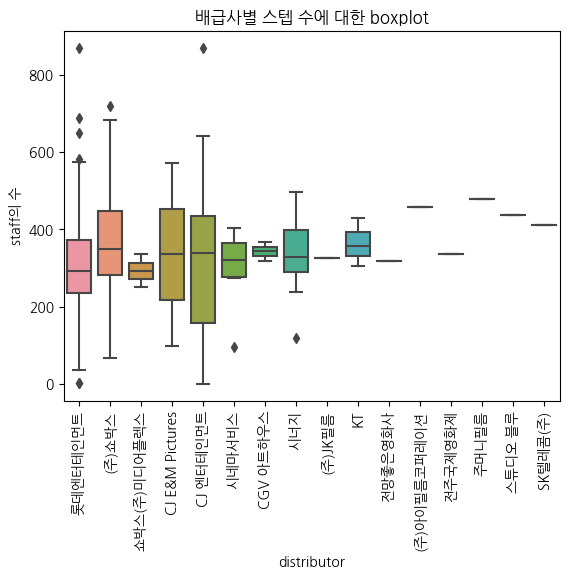

In [ ]:
plt.xticks(rotation=90)
ax=sns.boxplot(data=train_dist, x='distributor', y='num_staff')
ax.set_xlabel('distributor')
ax.set_ylabel('staff의 수')
ax.set_title('배급사별 스텝 수에 대한 boxplot')

**▶ 그래프 해석**
- CJ E&M Pictures와 CJ엔터테인먼트는 타 배급사에 비해 박스플랏의 범위가 넓고 이를 통해 두 배급사는 영화에 따라 스텝수가 크게 차이남을 알 수 있음.
- 롯데엔터테인먼트, (주)쇼박스, CJ엔터테인먼트에서 위쪽에 이상치가 존재하는 것을 보아 평균보다 훨씬 많은 스텝이 참여한 영화가 있음.
- 롯데엔터테인먼트, 시네마서비스, 시너지에서 아래쪽에 이상치가 존재하는 것을 보아 평균보다 스텝수가 훨씬 적게 참여했던 영화가 있음.
- 오른쪽의 전망좋은 영화사, 전주국제 영화제, 주머니 필름등의 배급사들은 제작한 영화의 수가 1개이기 때문에 온전한 박스플랏의 형태가 그려지지 않는다. 

## **(4) 감독의 이전 영화 평균 관객수와 현 영화 관객수의 관계**
* **사용 변수** 
##### dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
##### director : 감독이름
##### box_off_num : 관객수


In [ ]:
train_num=train[['director','dir_prev_bfnum', 'box_off_num']]

Text(0, 0.5, '해당 감독의 현재 영화의 관객 수')

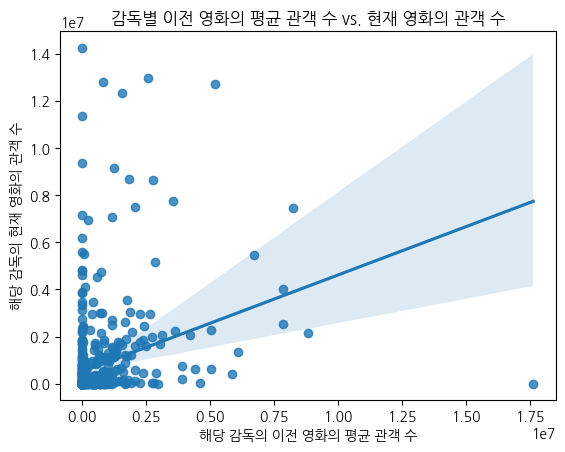

In [ ]:
ax = sns.regplot(data=train_num,x='dir_prev_bfnum', y='box_off_num')
ax.set_title('감독별 이전 영화의 평균 관객 수 vs. 현재 영화의 관객 수')
ax.set_xlabel('해당 감독의 이전 영화의 평균 관객 수')
ax.set_ylabel('해당 감독의 현재 영화의 관객 수')

**▶ 그래프 해석**
- 대부분의 데이터들이 관객수 250만명 이전에 분포한다.
- 그래프를 보았을 때 몇명 영화들은 해당 감독의 이전 영화 평균 관객수가 250만명 이하였음에도 불구하고 
현재 영화 관객수가 600만 이상으로 높다. 
- 이 데이터에는 해당 감독의 이전 영화 평균 관객수가 700만 이상으로 높은게 거의 없기 때문에, 이전 관객수가 높았을 때 다음 영화의 관객수가 어떤지 살펴보기 힘들다.

## **(5) 상영 등급 별 관객수**
* 사용 변수 
##### screening_rat : 상영 등급 
##### box_off_num : 관객수

<Axes: xlabel='screening_rat', ylabel='box_off_num'>

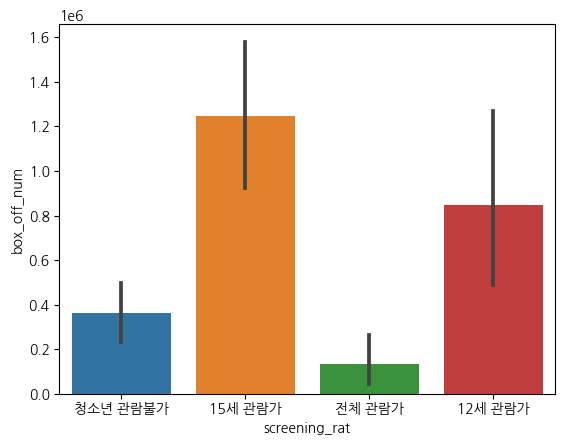

In [ ]:
num = train.groupby('screening_rat').sum('box_off_num')
sns.barplot(x='screening_rat', y='box_off_num', data=train)

**▶ 그래프 해석**
* 예상 
##### 볼 수 있는 사람이 많은 전체연령가보다는, 소비층이 넓고 반복적으로 소비할 수 있는 12-15세 연령가 작품이 많을 것이다
* 실제 결과 
##### 실제로 12-15세 연령가 작품의 소비자가 압도적으로 많았고, 오히려 전체 연령가보다 18세 이상 등급의 영화의 관객 수가 많았다.

## **(6) 장르별 영화 상영 시간**
* 사용 변수 
##### genre : 영화 장르 
##### time : 상영 시간

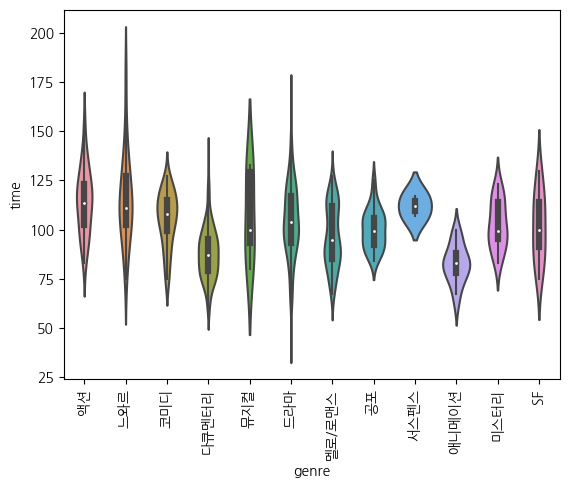

In [ ]:
plt.xticks(rotation=90)
sns.violinplot(x='genre', y='time', data=train)
plt.show()

**▶ 그래프 해석**
* 예상 
##### 장르 특성상 필요한 러닝타임이 있어서 편차는 크지 않지만, 다른 장르끼리의 차이는 크지 않을 것이다.
* 실제 결과 
##### 대부분 작품끼리 상영 시간 편차가 크기 때문에, 특정 장르에서 갖는 보편적인 상영 시간은 없다는 것을 생각할 수 있다.

## **(7) 장르와 관객 수의 상관관계**
* **사용 변수** 
##### genre : 장르
##### box_off_num : 관객수 

In [ ]:
genre_boxoffnum = train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')  # 장르별 평균 관객수
genre_boxoffnum.reset_index(inplace=True)
genre_boxoffnum

,genre,box_off_num
0,뮤지컬,6627.0
1,다큐멘터리,67172.3
2,서스펜스,82611.0
3,애니메이션,181926.7
4,멜로/로맨스,425968.0
5,미스터리,527548.2
6,공포,590832.5
7,드라마,625689.8
8,코미디,1193914.0
9,SF,1788345.7


Text(0.5, 1.0, '장르별 평균 관객수')

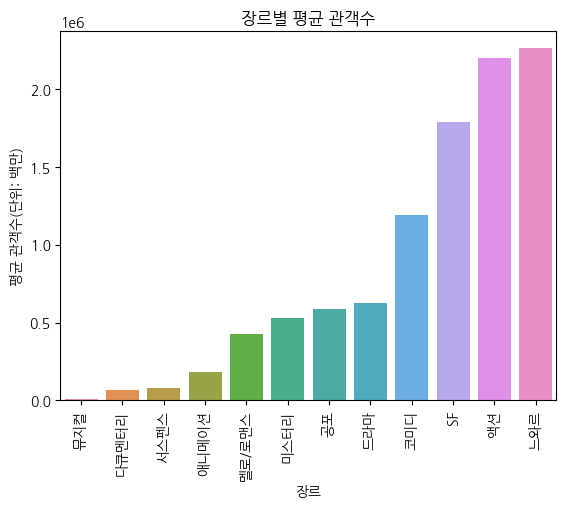

In [ ]:
plt.xticks(rotation=90)
ax=sns.barplot(data=genre_boxoffnum, x='genre', y='box_off_num')
ax.set_xlabel('장르')
ax.set_ylabel('평균 관객수(단위: 백만)')
ax.set_title('장르별 평균 관객수')

**▶ 그래프 해석**
* 액션과 느와르 장르의 평균 관객수가 많은 편이다.
* 평균 관객수가 가장 적은 장르는 뮤지컬이다.

## **(8) 배급사와 장르**
* **사용 변수** 
##### genre : 장르
##### distributor : 배급사

In [ ]:
train['distributor'].value_counts().sort_values(ascending=False)[:20]

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
시네마달         10
어뮤즈          10
(주)키노아이      10
시너지          10
인디플러그         9
KT&G 상상마당     8
NEW           8
인벤트 디         8
스폰지           7
무비꼴라쥬         6
Name: distributor, dtype: int64

In [ ]:
# 배급 영화가 20개 이상인 배급사만

cj = train[train['distributor'] == 'CJ 엔터테인먼트']
lotte = train[train['distributor'] == '롯데엔터테인먼트']
new = train[train['distributor'] == '(주)NEW']
mountainpictures = train[train['distributor'] == '(주)마운틴픽쳐스']
showbox = train[train['distributor'] == '(주)쇼박스']
indiestory = train[train['distributor'] == '인디스토리']

In [ ]:
cj_pie = pd.DataFrame(cj['genre'].value_counts() / cj['genre'].count()); cj_pie.reset_index(inplace=True)
lotte_pie = pd.DataFrame(lotte['genre'].value_counts() / lotte['genre'].count()); lotte_pie.reset_index(inplace=True)
new_pie = pd.DataFrame(new['genre'].value_counts() / new['genre'].count()); new_pie.reset_index(inplace=True)
mountainpictures_pie = pd.DataFrame(mountainpictures['genre'].value_counts() / mountainpictures['genre'].count()); mountainpictures_pie.reset_index(inplace=True)
showbox_pie = pd.DataFrame(showbox['genre'].value_counts() / showbox['genre'].count()); showbox_pie.reset_index(inplace=True)
indiestory_pie = pd.DataFrame(indiestory['genre'].value_counts() / indiestory['genre'].count()); indiestory_pie.reset_index(inplace=True)

### **그래프 1) 배급사 별 영화 장르 비율 원그래프**

Text(0.5, 1.0, '인디스토리 영화 장르 비율')

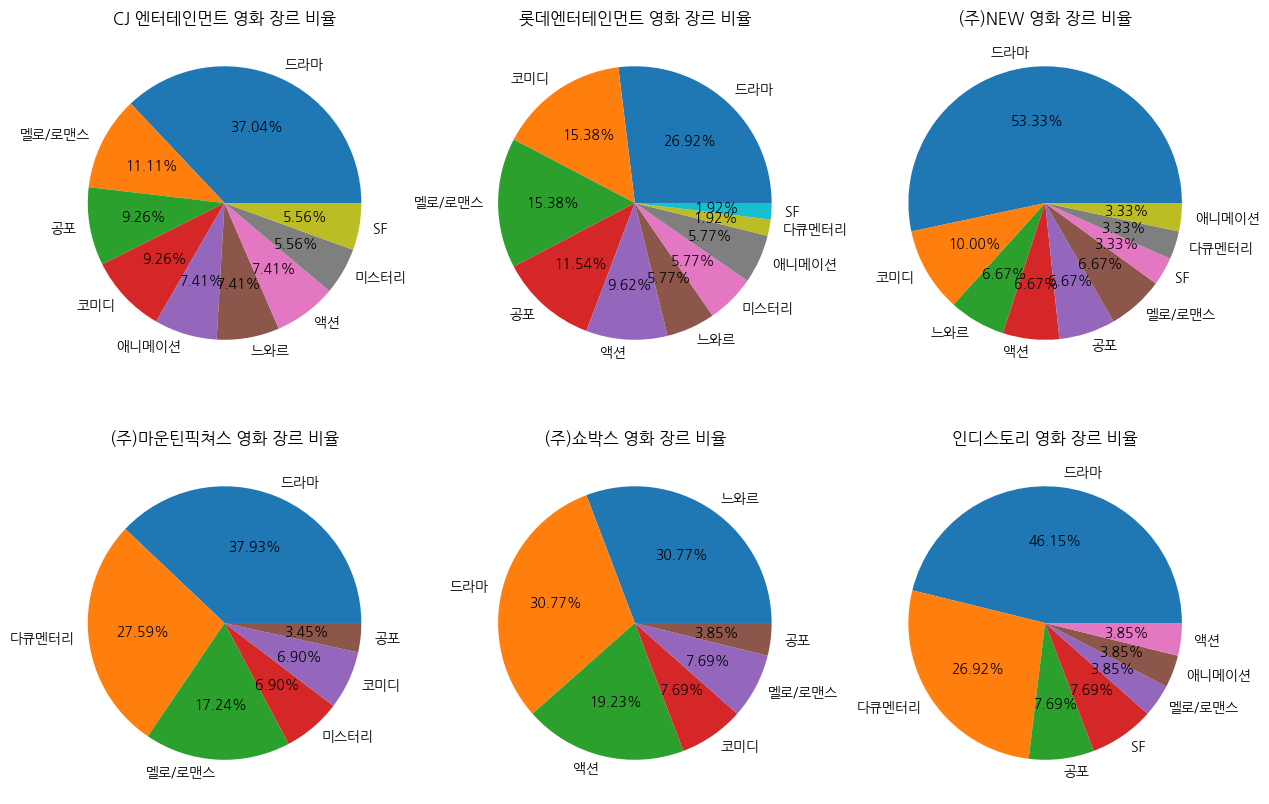

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.pie(x=list(cj_pie['genre']), labels=list(cj_pie['index']), autopct='%.2f%%')
plt.title('CJ 엔터테인먼트 영화 장르 비율')

plt.subplot(2,3,2)
plt.pie(x=list(lotte_pie['genre']), labels=list(lotte_pie['index']), autopct='%.2f%%')
plt.title('롯데엔터테인먼트 영화 장르 비율')

plt.subplot(2,3,3)
plt.pie(x=list(new_pie['genre']), labels=list(new_pie['index']), autopct='%.2f%%')
plt.title('(주)NEW 영화 장르 비율')

plt.subplot(2,3,4)
plt.pie(x=list(mountainpictures_pie['genre']), labels=list(mountainpictures_pie['index']), autopct='%.2f%%')
plt.title('(주)마운틴픽쳐스 영화 장르 비율')

plt.subplot(2,3,5)
plt.pie(x=list(showbox_pie['genre']), labels=list(showbox_pie['index']), autopct='%.2f%%')
plt.title('(주)쇼박스 영화 장르 비율')

plt.subplot(2,3,6)
plt.pie(x=list(indiestory_pie['genre']), labels=list(indiestory_pie['index']), autopct='%.2f%%')
plt.title('인디스토리 영화 장르 비율')

**▶ 그래프 해석**
* 장르별 평균 관객수는 액션과 느와르에서 높게 나타나는데 배급 영화가 많은 회사에서의 주된 배급 영화 장르는 드라마이다.

### **그래프 2) 막대그래프** 




<Axes: xlabel='distributor,genre'>

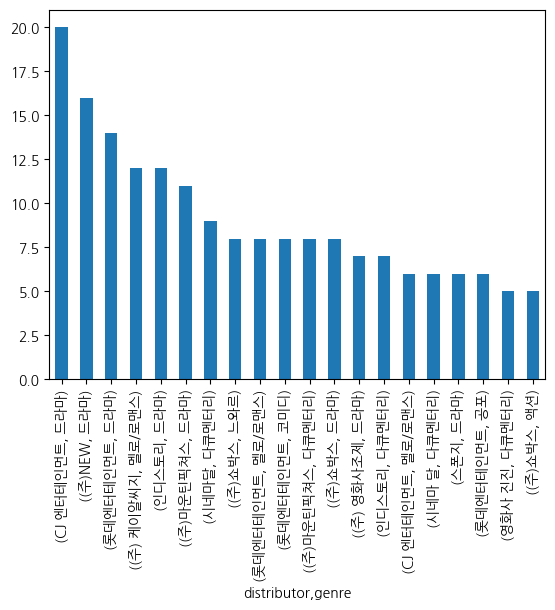

In [ ]:
train[['distributor', 'genre']].groupby('distributor').value_counts().sort_values(ascending=False)[:20].plot(kind='bar')

**▶ 그래프 해석**
* CJ엔터테인먼트에서 드라마를 20번으로 가장 많이 제작함
* 상위 1,2,3등이 모두 드라마 장르로 배급사들이 드라마를 많이 제작함을 확인할 수 있음.

## **(9) 제작한 영화 개수와 영화 관객수**
* **사용 변수** 
##### dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
##### box_off_num : 관객수
##### director : 감독이름

In [ ]:
# 감독으로 그룹화 -이 영화 만들기 전 제작에 참여한 영화의 개수 순으로 나열

train['box_off_num(단위:백만)']=train.box_off_num/1000000

train1=train[['director','dir_prev_num','box_off_num(단위:백만)']].groupby('director').mean().sort_values('dir_prev_num',ascending=False)

train1=train1[0:20]

train1

,dir_prev_num,box_off_num(단위:백만)
director,,
이해준,5.0,0.4
김진영,5.0,0.5
홍원찬,4.0,0.4
이해영,4.0,0.3
김휘,4.0,1.3
정세교,4.0,0.0
장철수,4.0,7.0
김봉주,4.0,1.6
국동석,4.0,1.8


<Axes: xlabel='director'>

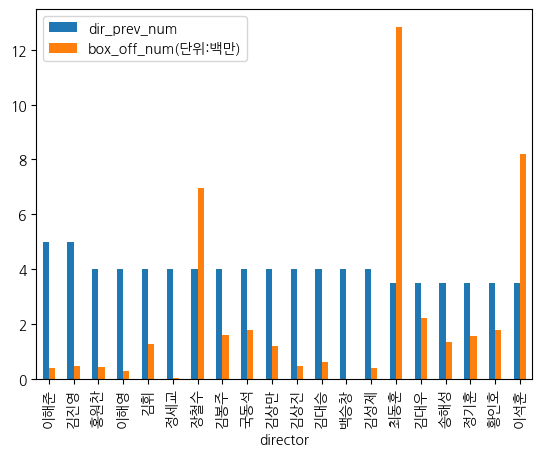

In [ ]:
train1.plot(kind='bar')

**▶ 그래프 해석**
* 영화 참여 작품 개수와 평균 영화 관람객은 상관이 없는 것으로 보임.

## **(10) 영화 제목 길이와 장르**
* **사용 변수** 
##### title : 영화의 제목
##### genre : 장르

In [ ]:
#step1. 영화 제목 길이를 나타내는 행(lentitle) 추가
train['lentitle']= 3

for i in range(600):
  train.lentitle[i]=len(train.title[i])
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday,box_off_num(단위:백만),lentitle
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3,0.0,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3,7.1,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2,7.0,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3,0.2,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3,0.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091,2014,8,13,2,1.5,2
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438,2013,3,14,3,1.7,4
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.0,0,123,4,2475,2010,9,30,3,0.0,5
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.0,0,431,4,2192525,2015,5,14,3,2.2,6


<Axes: xlabel='genre'>

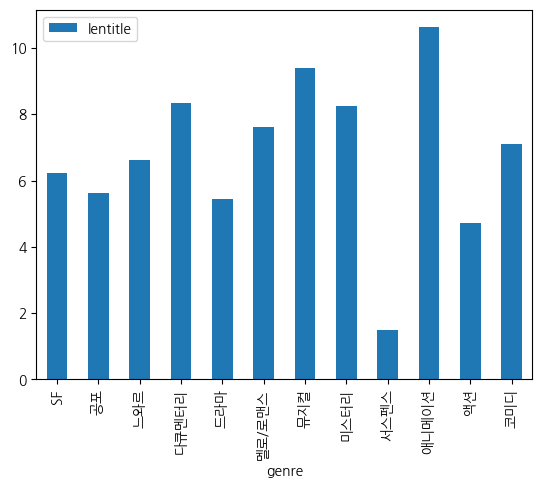

In [ ]:
#step2. 장르로 그룹화해서 plot 그리기기

train[['genre','lentitle']].groupby('genre').mean().plot(kind='bar')

**▶ 그래프 해석**
* 애니메이션이 제목의 평균 길이가 가장 길며, 서스펜스 장르가 가장 짧음.
* 대부분의 장르는 4~8 사이의 평균 제목 길이를 가짐.